# No-show appointments Analysis Report

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitaions">Limitaions</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction
*A person makes a doctor appointment, receives all the instructions and does not attend at the appointment. Who to blame? This dataset contains 110.527 medical appointments its 14 associated variables (characteristics). At the End of this analysis 3 main questions are needed to be answered:*

1. ***Does Time between ScheduledDay and AppointmentDay affects Attendence?***
2. ***Does SMS_received affects the Attendence?***
3. ***Is there any disease have large rate of attendence than other?***
4. ***What is the dominat disease at each age?***


In [99]:
!rm noshowappointments-kagglev2-may-2016.csv

In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

>**0. Download the DataFrame**: *dataframe is not included with this workplace so we need to downloaded to this workplace first.Then we query some info function to be more familier with the data.*

In [101]:
!wget https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv

--2020-11-12 15:11:00--  https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 13.226.23.18, 13.226.23.55, 13.226.23.199, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|13.226.23.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10739535 (10M) [text/csv]
Saving to: ‘noshowappointments-kagglev2-may-2016.csv’

noshowappointments- 100%[===================>]  10.24M  --.-KB/s    in 0.1s    

2020-11-12 15:11:01 (95.5 MB/s) - ‘noshowappointments-kagglev2-may-2016.csv’ saved [10739535/10739535]



In [102]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [103]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [105]:
print(type(df.ScheduledDay[0]),type(df.AppointmentDay[0]))

<class 'str'> <class 'str'>


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [107]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [108]:
df.duplicated().sum()

0

## Cleaning

>**1. Clean Age Data**: *looking to describe method output we see that min age of patient is -1 year old which is nonsence. So, we filter all age to show all the patients with ages above 0 year old (baby born)*

In [109]:
df = df[df['Age'] >= 0]

>**2. Adjust data format**: *looking to the dataframe we see that both AppointmentDay and ScheduledDay are strings. So, we shall change them to timedata format then we need to the ScheduledDay show up to day. So, we trim the hours, minutes and seconds. Also, both patientID and AppointmentID are numerical data(quantitative data) we need to convert them to strings(categorical data).*

In [110]:
# time data adjustment
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.floor('d')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])


# Ids adjustment to string 
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

>**3. Create Waiting column:** *This column represent the day difference between scheduledday and appointmentday. Then we need to remove all nonsense data.*

In [111]:
df['waiting'] = df.AppointmentDay - df.ScheduledDay
df['waiting'] = df['waiting'].dt.days.astype('int16')

In [112]:
df = df[df.waiting >= 0]

>**4. Rename Columns**: *No-Show column is not proper in some dataframe method and querys. Also, it has a counfusing meaning as No-Show means Not-Attend so we change the name to Attendence also we change the values to match the meanign of new name.*

In [113]:
def attend_func(a):
    '''
    This function is used for changing the No-show columns values to the Attendence columns values.
    Input: 
        a: record of column value
    Output:
        it returns an inverted numrical value.
    '''
    if a=='Yes':
        return 0
    else: 
        return 1

In [114]:
df.rename(columns={'No-show':'Attendence'}, inplace=True)
df['Attendence'] = df['Attendence'].apply(lambda x: attend_func(x))

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110521 non-null object
AppointmentID     110521 non-null object
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
Attendence        110521 non-null int64
waiting           110521 non-null int16
dtypes: datetime64[ns](2), int16(1), int64(8), object(4)
memory usage: 12.9+ MB


In [116]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendence,waiting
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.798102,10.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

##### Quick overview
1. Show the distribution of each attribute.
1. Check outliers.
2. Remove outliers.

#### 1. Show the distribution of each attribute.

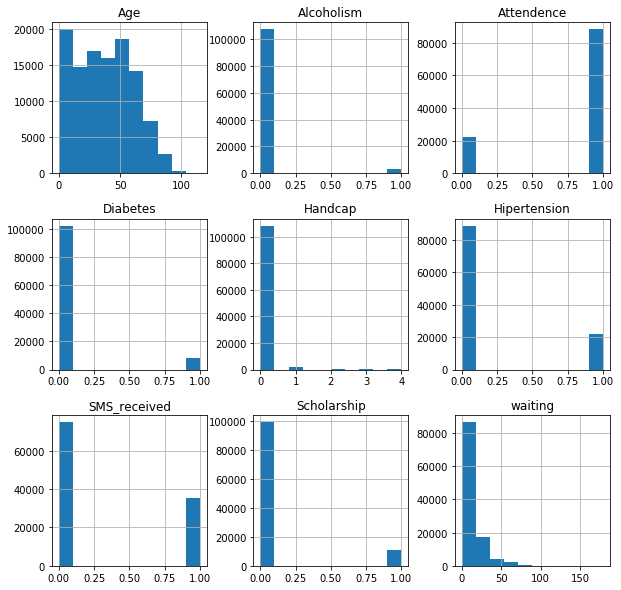

In [117]:
df.hist(figsize=(10,10));

#### 2. Check outliers
>**waiting time outliers:** *Looking to waiting time histogram. The histogram is highly skewed to right. Triming waiting time to 40 days we reduce the outliers effect and we include 95% of the original data.*

In [118]:
print(f'waiting time mean: {df.waiting.mean()}')
print(f'waiting time median: {df.waiting.median()}')
print(f'waiting time std: {df.waiting.std()}')

waiting time mean: 10.184345056595578
waiting time median: 4.0
waiting time std: 15.255153497495439


#### 3. Remove outliers

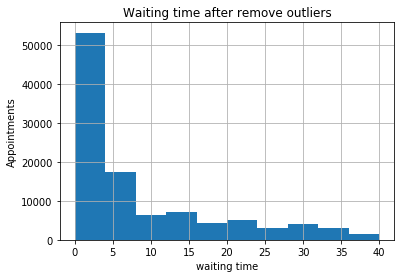

In [119]:
df = df[df['waiting']<=40]
df['waiting'].hist()
plt.xlabel('waiting time')
plt.ylabel('Appointments')
plt.title('Waiting time after remove outliers');

## *Does Time between ScheduledDay and AppointmentDay affects Attendence?*

***Explor Attendence due to waiting time***

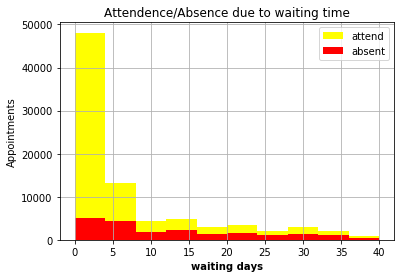

In [120]:
df.query('Attendence == 1').waiting.hist(label='attend',color='yellow')
df.query('Attendence == 0').waiting.hist(label='absent',color='red')
plt.title('Attendence/Absence due to waiting time')
plt.xlabel('waiting days',fontweight='bold')
plt.ylabel('Appointments')
plt.legend();

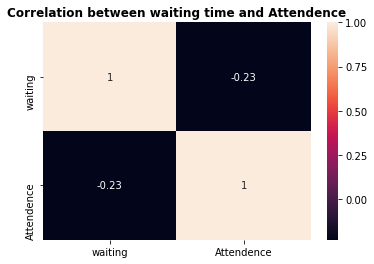

In [121]:
corrMatrix = df[['waiting','Attendence']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation between waiting time and Attendence',fontweight='bold')
plt.show()

In [122]:
pre_atted_1, pre_abs_1 = df.query('waiting <= 5').Attendence.value_counts(normalize=True) 
pre_atted_2, pre_abs_2 = df.query('(waiting > 5) &(waiting <=8)').Attendence.value_counts(normalize=True)
pre_atted_3, pre_abs_3 = df.query('(waiting > 8) &(waiting <=15)').Attendence.value_counts(normalize=True)
pre_atted_4, pre_abs_4 = df.query('(waiting > 10) &(waiting <= 20)').Attendence.value_counts(normalize=True)

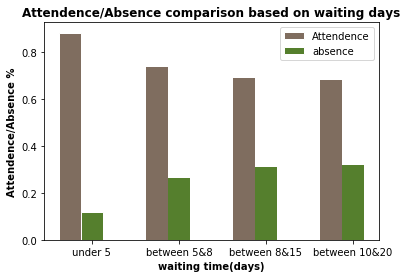

In [123]:
barWidth = 0.25
bars1 = [pre_atted_1, pre_atted_2, pre_atted_3, pre_atted_4]
bars2 = [pre_abs_1, pre_abs_2, pre_abs_3, pre_abs_4]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Attendence')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='absence')
 
plt.xlabel('waiting time(days)', fontweight='bold')
plt.ylabel('Attendence/Absence %', fontweight='bold')
plt.title('Attendence/Absence comparison based on waiting days', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['under 5', 'between 5&8', 'between 8&15', 'between 10&20'])

plt.legend()
plt.show()

**Conclusion:** *From the above plots. Overall, there is a weak correlation between waiting time and Attendence but with more focus on specific waiting time periods, we see When waiting days between ScheduledDay and AppointmentDay upto 5 days Attendence is the most compared to absence. Waiting time between 5 & 8 days Attendence reduces. Then Attendence for further waiting times is going to sattle down to 68% attendence 29% absence.*

## *Does SMS_received affects the Attendence?*

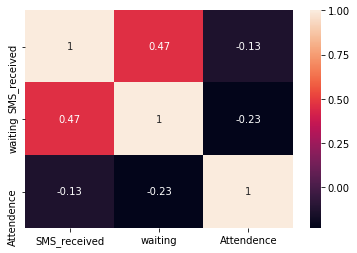

In [124]:
corrMatrix = df[['SMS_received','waiting','Attendence']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

>**Conclusion:** *SMS_received has a moderate positive correlation with waiting time but it has a weak negative correlation with Attendence because Attendence has also a weak correlation with waiting time overall.*

## *Is there any disease have large rate of attendence than other?*

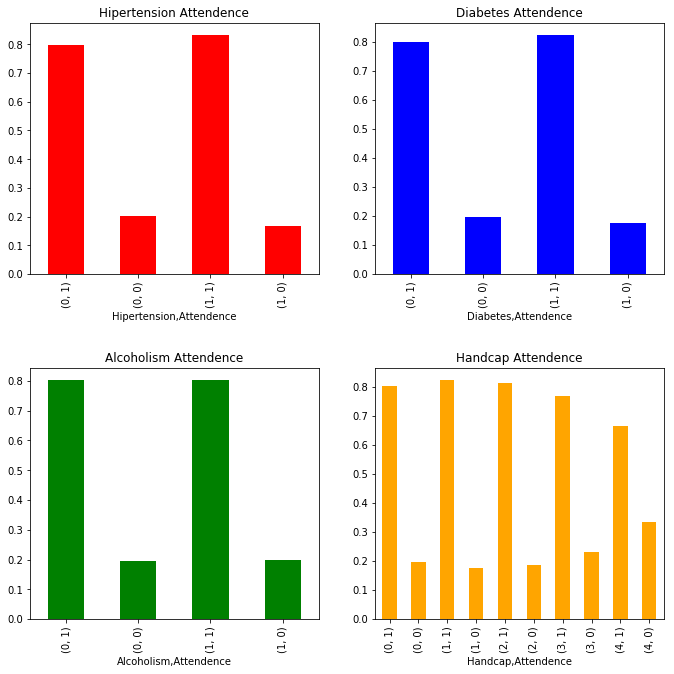

In [125]:
fig, axes = plt.subplots(figsize=(10,10),nrows=2,ncols=2)
plot_1 = df.groupby(['Hipertension'])['Attendence'].value_counts(normalize=True).plot(ax=axes[0,0],kind='bar',color='red')
plot_2 = df.groupby(['Diabetes'])['Attendence'].value_counts(normalize=True).plot(ax=axes[0,1],kind='bar',color='blue')
plot_3 = df.groupby(['Alcoholism'])['Attendence'].value_counts(normalize=True).plot(ax=axes[1,0],kind='bar',color='green')
plot_4 = df.groupby(['Handcap'])['Attendence'].value_counts(normalize=True).plot(ax=axes[1,1],kind='bar',color='orange')

plot_1.set_title('Hipertension Attendence')
plot_2.set_title('Diabetes Attendence')
plot_3.set_title('Alcoholism Attendence')
plot_4.set_title('Handcap Attendence')
fig.tight_layout(pad=3.0)

plt.show()

Attendence and Absence precentage doesnot change what ever the disease is. it is always 80% to 20%. Expect Handcap There are some change in level 2 and a seginficant change in level 3 handcap.

## *What is the dominat disease at each age?*

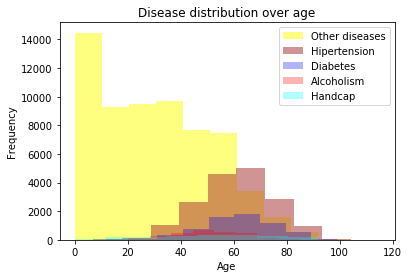

In [126]:
df.query('(Attendence == 1) & (Hipertension!=1) & (Diabetes!=1) & (Alcoholism!=1)& (Handcap==0)')['Age'].plot(kind='hist',alpha=0.5,color='yellow',label='Other diseases')
df.query('(Attendence == 1) & (Hipertension==1)')['Age'].plot(kind='hist',alpha=0.5,color='brown',label='Hipertension')
df.query('(Attendence == 1) & (Diabetes==1)')['Age'].plot(kind='hist',alpha=0.3,color='blue',label='Diabetes')
df.query('(Attendence == 1) & (Alcoholism==1)')['Age'].plot(kind='hist',alpha=0.3,color='red',label='Alcoholism')
df.query('(Attendence == 1) & (Handcap!=0)')['Age'].plot(kind='hist',alpha=0.3,color='cyan',label='Handcap')
plt.title('Disease distribution over age')
plt.xlabel('Age')
plt.legend();

>**Conclusion**: *At age of 60 and above the dominat disease among the patients is Hipertension. For those who are below age of 60 other diseases are the dominat. So, Hipertension and Diabetes are Elder related diseases.*

<a id='limitaions'></a>

## Limitaions:
*During the Analysis There are some limitaions reduce the amount of information geathered from analysis.*
1. *Extract useful information which can be used in analysis. Ex: "waiting time (waiting)".*
2. *Attribute like Neighbourhood could have been more useful if it was assocatied with locations (Lat,Lon).*
3. *Dataset contains almostly non-deagnosed desieses which made the analysis to hard to show the correlation between Attendence and different desieses.*

<a id='conclusions'></a>
## Conclusions

> **First**: *Overall, there is a weak correlation between waiting time and Attendence but with more focus on specific waiting time periods, we see When waiting days between ScheduledDay and AppointmentDay upto 5 days Attendence is the most compared to absence. Waiting time between 5 & 8 days Attendence reduces. Then Attendence for further waiting times is going to sattle down to 68% attendence 29% absence.*

>**Second** *SMS_received has a moderate positive correlation with waiting time but it has a weak negative correlation with Attendence because Attendence has also a weak correlation with waiting time overall.*

> **Third**: *Attendence and Absence precentage doesnot change what ever the disease is. it is always 80% to 20%. Expect Handcap There are some change in level 2 and a seginficant change in level 3 handcap.*

> **Finally**: *Most of the dataset patients are diagnosed with a disease other the dataset defined diseases. And the Hipertension appears the most disease for the patients above their 60.*

In [127]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0